## Introdução

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Este projeto aborda a resolução de um problema de agendamento de tarefas com restrições, onde o objetivo é encontrar um cronograma ótimo para a execução de atividades. Para isso, o algoritmo utiliza técnicas de **satisfação de restrições (CSP)**, respeitando as **dependências entre tarefas**, a **capacidade de recursos disponíveis** e os **prazos estabelecidos**.

O problema consiste em programar tarefas de um projeto com diferentes modos de execução, cada um com sua respectiva duração e consumo de recursos. O objetivo principal do algoritmo é **minimizar o makespan**, ou seja, o tempo total necessário para concluir todas as tarefas, garantindo que nenhuma restrição seja violada.

As restrições consideradas no problema incluem:
- **Precedência entre tarefas**: uma tarefa só pode começar após a conclusão de suas predecessoras.
- **Capacidade de recursos**: cada tarefa consome recursos renováveis limitados (disponíveis por dia) ou não renováveis (limitados no total).

O algoritmo processa dados de entrada fornecidos em formato de dataset, onde estão descritas as tarefas, recursos disponíveis e suas interdependências. A partir dessas informações, são geradas soluções viáveis e ótimas para o cronograma, respeitando as restrições e maximizando a eficiência do uso de recursos.

Este projeto combina técnicas de otimização e programação, permitindo a aplicação em cenários reais onde a gestão eficiente do tempo e dos recursos é essencial.

</div>


### Constituição do Grupo:
- **Pedro Vieira (25626);**
- **Rafael Silva (25690);**
- **Gonçalo Costa (26007).**


## Instalação da Biblioteca

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Neste projeto, utilizamos a biblioteca `python-constraint`, que fornece funcionalidades para resolver problemas de **satisfação de restrições (Constraint Satisfaction Problems - CSP)**. Ela é essencial para modelar as restrições de precedência, capacidade de recursos e outros requisitos do problema de agendamento abordado.

Para instalar a biblioteca, execute o comando abaixo:

In [1]:
# Install contraint lybrary
%pip install python-constraint

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importações de Biblioteca

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Neste projeto, utilizamos diversas bibliotecas para facilitar a implementação do algoritmo de agendamento de tarefas com restrições. Abaixo, listamos as bibliotecas utilizadas e suas respectivas funções no projeto:

### **Bibliotecas para Resolução de Restrições**
- `constraint`:
  - É a principal biblioteca do projeto, utilizada para modelar problemas de **satisfação de restrições (CSP)**.
  - Fornece funcionalidades como `Problem` para definir variáveis e restrições e `FunctionConstraint` para restrições personalizadas.

### **Bibliotecas para Manipulação de Dados**
- `numpy`:
  - Utilizado para realizar operações matemáticas e manipulação de arrays, otimizando cálculos no algoritmo.
- `collections`:
  - `deque`: Facilita a implementação de algoritmos como BFS ou DFS.
  - `defaultdict`: Auxilia na organização de dados relacionados a tarefas e recursos.

### **Bibliotecas para Visualização**
- `matplotlib`:
  - Responsável por criar gráficos, incluindo o **Gráfico de Gantt**, que ajuda a visualizar a execução das tarefas no tempo.

### **Bibliotecas Utilitárias**
- `time`:
  - Utilizada para medir o tempo de execução do algoritmo, importante para análise de desempenho.
- `pprint`:
  - Usado para exibir informações de maneira formatada e legível no terminal.

<br>
Abaixo está o código que importa todas as bibliotecas necessárias para o projeto:

In [2]:
# Import contraint lybrary
import time
import numpy as np
from constraint import *
from pprint import pprint
from constraint import Problem
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import deque, defaultdict
from constraint import Problem, FunctionConstraint


## Carregar e Ler Arquivo

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Nesta etapa, o objetivo é carregar e visualizar o conteúdo do dataset que será utilizado no algoritmo. O dataset contém informações detalhadas sobre as tarefas, recursos disponíveis e restrições que devem ser respeitadas durante o agendamento.

### **Propósito**
- Ler o arquivo para compreender a estrutura e os dados disponíveis.
- Exibir o conteúdo para facilitar a análise e garantir que o arquivo foi carregado corretamente.
- Preparar os dados para as etapas posteriores, onde serão processados e utilizados no algoritmo.

In [3]:
# Example of direct loading
file_path = "../data-sets/p01_dataset_10.txt"

# Load and read the file
with open(file_path, 'r') as file:
    information_list = file.read()

# Display the file content
print(information_list)

************************************************************************
#General Information
projects                      :  1
jobs (incl. supersource/sink ):  12
horizon                       :  46
RESOURCES
  - renewable                 :  2   R
  - nonrenewable              :  0   N
  - doubly constrained        :  0   D
************************************************************************
#Projects summary
pronr.  #jobs rel.date duedate tardcost  MPM-Time
    1     10      0       22        3       22
************************************************************************
#Precedence relations
#jobnr.    #modes  #successors   successors
   1        1          3           2   3   4
   2        3          2           5   6
   3        3          2          10  11
   4        3          1           9
   5        3          2           7   8
   6        3          2          10  11
   7        3          2           9  10
   8        3          1           9
   9        3        

## Lendo e Analisando o Arquivo

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

A função `parse_file` é responsável por processar e estruturar os dados do dataset fornecido. O arquivo contém informações sobre os projetos, tarefas, recursos disponíveis e as restrições que devem ser respeitadas no problema de agendamento. Esta etapa é essencial para garantir que os dados sejam corretamente interpretados e utilizados pelo algoritmo principal.

### **Objetivo da Função**
- **Ler o arquivo**: O dataset é carregado linha por linha, separando as informações relevantes.
- **Identificar seções**: As seções do dataset (como precedência de tarefas, disponibilidade de recursos e duração) são reconhecidas automaticamente.
- **Estruturar os dados**: Os dados são organizados em um dicionário (`information_list`), que é utilizado nas etapas seguintes do algoritmo.

### **Descrição do Código**
O código executa as seguintes etapas:
1. **Inicialização do Dicionário**:
   - Um dicionário chamado `information_list` é criado para armazenar as informações do arquivo de forma organizada.
   - As chaves representam diferentes partes do dataset, como `projects`, `jobs`, `precedenceRelations`, entre outros.

2. **Leitura do Arquivo**:
   - O arquivo é aberto no modo leitura (`'r'`) e processado linha por linha.
   - Linhas vazias ou comentários (começando com `#`) são ignorados, mas ajudam a identificar a seção atual do arquivo.

3. **Processamento de Dados**:
   - Dependendo da seção atual, os dados são processados e armazenados no dicionário:
     - **`projects`**, `jobs`, `horizon`: Lidos diretamente como inteiros.
     - **`projectSummary`**: Contém informações gerais sobre os projetos (datas, custos de atraso, etc.).
     - **`precedenceRelations`**: Define a precedência entre tarefas e seus sucessores.
     - **`requestsDurations`**: Contém a duração das tarefas e os recursos necessários para cada uma.
     - **`resourceAvailabilities`**: Indica a quantidade disponível de cada recurso.

4. **Estrutura Dinâmica**:
   - Recursos são identificados dinamicamente com chaves como `R1`, `R2`, etc., para garantir flexibilidade com diferentes datasets.

### **Resultados Esperados**
Ao final da execução, a função retorna o dicionário `information_list` com os dados organizados. Isso permite que as próximas etapas do algoritmo utilizem essas informações para construir o modelo de agendamento e aplicar as restrições.


In [4]:
def parse_file(file_path):
    information_list = {
        'projects': None,
        'jobs': None,
        'horizon': None,
        'resources': {},
        'projectSummary': [],
        'precedenceRelations': [],
        'requestsDurations': [],
        'resourceAvailabilities': []
    }

    with open(file_path, 'r') as file:
        lines = file.readlines()

    current_section = None

    for line in lines:
        line = line.strip()

        # Ignore linhas vazias ou comentários
        if not line or line.startswith("#"):
            if line.startswith("#Projects summary"):
                current_section = "projectSummary"
            elif line.startswith("#Precedence relations"):
                current_section = "precedenceRelations"
            elif line.startswith("#Duration and resources"):
                current_section = "requestsDurations"
            elif line.startswith("#Resource availability"):
                current_section = "resourceAvailabilities"
            continue

        # Processar dados principais
        if line.startswith("projects"):
            information_list['projects'] = int(line.split(":")[1].strip())
        elif line.startswith("jobs"):
            information_list['jobs'] = int(line.split(":")[1].strip())
        elif line.startswith("horizon"):
            information_list['horizon'] = int(line.split(":")[1].strip())
        elif line.startswith("RESOURCES"):
            current_section = "resources"

        # Processar seções específicas
        elif current_section == "projectSummary":
            parts = line.split()
            # Verifique se a linha contém exatamente 6 partes e todas são números
            if len(parts) > 0 and parts[0].isdigit():
                information_list['projectSummary'].append({
                    'project_nr': int(parts[0]),
                    'jobs': int(parts[1]),
                    'rel_date': int(parts[2]),
                    'duedate': int(parts[3]),
                    'tardcost': int(parts[4]),
                    'MPM_Time': int(parts[5])
                })
        elif current_section == "precedenceRelations":
            parts = line.split()
            if len(parts) > 0 and parts[0].isdigit():
                information_list['precedenceRelations'].append({
                    'jobnr': int(parts[0]),
                    'modes': int(parts[1]),
                    'successors_count': int(parts[2]),
                    'successors': list(map(int, parts[3:]))
                })
        elif current_section == "requestsDurations":
            parts = line.split()
            if len(parts) > 0 and parts[0].isdigit():
                request_info = {
                    'jobnr': int(parts[0]),
                    'mode': int(parts[1]),
                    'duration': int(parts[2])
                }
                i = 1  # Contador de recursos
                for part in enumerate(parts[3:]):  # Iterar sobre as partes começando no índice 3
                    index, value = part   # Extrai o índice e o valor do tuplo retornado por enumerate
                    resource_key = f'R{i}' # Cria a chave dinâmica R1, R2, etc.
                    request_info[resource_key] = int(value)  # Atribui o valor ao dicionário request_info
                    i += 1  # Incrementa o contador de recursos
                information_list['requestsDurations'].append(request_info)
        elif current_section == "resourceAvailabilities":
            parts = line.split()
            if len(parts) > 0 and parts[0].startswith("R"):
                information_list['resourceAvailabilities'].append({
                    'resourceN': parts[0],
                    'qty': int(parts[1])
                })

    return information_list

## Verificando a Leitura e Análise do Conjunto de Dados

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Após executar a função `parse_file`, é essencial verificar se os dados do dataset foram corretamente lidos e organizados na estrutura `information_list`. Essa etapa garante que a lógica de parsing está funcionando conforme o esperado e que nenhuma informação foi perdida ou mal interpretada.

### **Objetivo**
- Validar se a função `parse_file` processou o dataset corretamente.
- Exibir o conteúdo da estrutura de dados `information_list` de forma legível e organizada.

### **Descrição do Código**
O código abaixo realiza dois passos principais:
1. **Executar a Função de Parsing**:
   - A função `parse_file` é chamada com o caminho do arquivo (`file_path`) e processa o dataset, retornando a estrutura de dados `information_list`.
2. **Exibir o Conteúdo de Forma Legível**:
   - Utiliza a biblioteca `pprint` (pretty print) para exibir o conteúdo da estrutura `information_list` de maneira formatada e fácil de interpretar.

In [5]:
information_list = parse_file(file_path)

# Exibição formatada
pprint(information_list)

{'horizon': 46,
 'jobs': 12,
 'precedenceRelations': [{'jobnr': 1,
                          'modes': 1,
                          'successors': [2, 3, 4],
                          'successors_count': 3},
                         {'jobnr': 2,
                          'modes': 3,
                          'successors': [5, 6],
                          'successors_count': 2},
                         {'jobnr': 3,
                          'modes': 3,
                          'successors': [10, 11],
                          'successors_count': 2},
                         {'jobnr': 4,
                          'modes': 3,
                          'successors': [9],
                          'successors_count': 1},
                         {'jobnr': 5,
                          'modes': 3,
                          'successors': [7, 8],
                          'successors_count': 2},
                         {'jobnr': 6,
                          'modes': 3,
                       

# Calculando Domínio

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

A função `calculate_task_domain` é responsável por determinar os **tempos de início mais cedo** e **tempos de início mais tarde** para cada tarefa no projeto, respeitando as **restrições de precedência** entre elas. Esses tempos formam os **domínios de início** de cada tarefa, indicando os intervalos possíveis de tempo em que podem ser iniciadas.

### **Objetivo da Função**
- Calcular o **tempo mais cedo** (`earliest_start`) em que cada tarefa pode ser iniciada, considerando as restrições de predecessores.
- Calcular o **tempo mais tarde** (`latest_start`) em que cada tarefa pode ser iniciada sem atrasar o término do projeto (dentro do `duedate`).
- Garantir que todas as dependências e restrições de precedência sejam respeitadas.

### **Descrição do Código**
A função é dividida em três etapas principais:

1. **Inicialização de Estruturas**:
   - `earliest_start`: Inicializado com `0` para todas as tarefas.
   - `latest_start`: Inicializado com o prazo final (`duedate`) para todas as tarefas.
   - `in_degree`: Contador de predecessores para cada tarefa.
   - `adj_list`: Lista de adjacência para representar o grafo de precedência entre tarefas.

2. **Cálculo do Tempo Mais Cedo**:
   - Utiliza uma fila (`queue`) para realizar uma **passagem para frente** no grafo de precedência.
   - Calcula o tempo mais cedo em que cada tarefa pode ser iniciada com base nos tempos de término de seus predecessores.

3. **Cálculo do Tempo Mais Tarde**:
   - Utiliza uma fila reversa (`reverse_queue`) para realizar uma **passagem para trás** no grafo de precedência.
   - Calcula o tempo mais tarde em que cada tarefa pode ser iniciada sem atrasar o término do projeto.

### **Como Funciona**
- A função processa o grafo de precedência usando duas travessias:
  - **Passagem para frente**: Determina o tempo mais cedo de início para cada tarefa.
  - **Passagem para trás**: Determina o tempo mais tarde de início para cada tarefa.
- As tarefas sem predecessores começam no tempo `0` e são adicionadas inicialmente à fila.
- Durante as travessias, o domínio de cada tarefa é atualizado com base em seus predecessores e sucessores.

### **Exemplo de Resultados**
Considere um projeto com as seguintes tarefas e precedências:
- Tarefa 1 → Tarefa 2 → Tarefa 3
- Durações: T1 = 3, T2 = 4, T3 = 2
- Prazo final (`duedate`): 10

Os resultados da função seriam:
- `earliest_start`: {T1: 0, T2: 3, T3: 7}
- `latest_start`: {T1: 0, T2: 4, T3: 8}

Isso indica que:
- Tarefa 1 pode começar no tempo 0 e deve terminar no tempo 3.
- Tarefa 2 pode começar no tempo 3 ou no máximo até o tempo 4.
- Tarefa 3 pode começar no tempo 7 ou no máximo até o tempo 8.

### **Resultados Esperados**
A função retorna dois dicionários:
1. `earliest_start`: Os tempos mais cedo em que cada tarefa pode ser iniciada.
2. `latest_start`: Os tempos mais tarde em que cada tarefa pode ser iniciada sem atrasar o projeto.

### **Importância no Algoritmo**
O cálculo do domínio é essencial para:
- Definir os intervalos de início possíveis para cada tarefa.
- Respeitar as restrições de precedência.
- Minimizar atrasos no cronograma geral do projeto.


In [6]:
def calculate_task_domain(tasks, precedence_relations, durations, duedate):
    # Inicializar dicionários
    earliest_start = {task: 0 for task in tasks}  # Armazena os tempos de início mais cedo para cada tarefa
    latest_start = {task: duedate for task in tasks}  # Armazena os tempos de início mais tarde para cada tarefa
    in_degree = {task: 0 for task in tasks}  # Contador de predecessores de cada tarefa
    adj_list = defaultdict(list)  # Lista de adjacência para representar o grafo de precedências

    # Construir a lista de adjacência e contar predecessores
    for task, successors in precedence_relations.items():
        for successor in successors:
            if successor == 0:
                continue  # Ignorar sucessores fictícios (ex.: tarefas dummy)
            adj_list[task].append(successor)  # Adicionar o sucessor à lista de adjacência
            in_degree[successor] += 1  # Incrementar o número de predecessores do sucessor

    # Passagem para a frente para calcular os tempos mais cedo
    queue = deque([task for task in tasks if in_degree[task] == 0])  # Tarefas sem predecessores começam a 0
    while queue:
        task = queue.popleft()  # Retirar a tarefa da frente da fila
        task_end = earliest_start[task] + durations[task]  # Calcular o tempo de fim da tarefa
        for successor in adj_list[task]:  # Iterar sobre os sucessores da tarefa
            earliest_start[successor] = max(earliest_start[successor], task_end)  # Atualizar o início mais cedo
            in_degree[successor] -= 1  # Diminuir o número de predecessores restantes
            if in_degree[successor] == 0:  # Se não restarem predecessores, adicionar à fila
                queue.append(successor)

    # Passagem para trás para calcular os tempos mais tarde
    reverse_queue = deque([task for task in tasks if not adj_list[task]])  # Tarefas sem sucessores
    while reverse_queue:
        task = reverse_queue.popleft()  # Retirar a tarefa da frente da fila inversa
        task_start = latest_start[task] - durations[task]  # Calcular o início mais tarde
        for predecessor, successors in precedence_relations.items():  # Iterar sobre as relações de precedência
            if task in successors:  # Verificar se a tarefa é um sucessor do predecessor atual
                latest_start[predecessor] = min(latest_start[predecessor], task_start)  # Atualizar o início mais tarde
                if predecessor not in reverse_queue:  # Adicionar o predecessor à fila se ainda não estiver
                    reverse_queue.append(predecessor)
                    
    return earliest_start, latest_start  # Retornar os tempos mais cedo e mais tarde


## Verificando Domínio

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

A função `validate_domains` desempenha um papel crucial no algoritmo, garantindo que os tempos de início calculados para cada tarefa estejam corretos e respeitem as restrições definidas. Essas validações são fundamentais para identificar possíveis erros ou inconsistências nos domínios de início (`earliest_start` e `latest_start`) das tarefas antes de prosseguir com o agendamento.

### **Objetivo da Função**
- Verificar se os tempos de início mais cedo e mais tarde das tarefas estão dentro dos limites definidos pelo horizonte do projeto.
- Garantir que as restrições de precedência entre tarefas sejam respeitadas.
- Detectar erros estruturais, como inconsistências nos domínios calculados.

### **Descrição do Código**
A função realiza três tipos de validações:

1. **Validação de Horizonte**:
   - Verifica se os tempos de início das tarefas estão dentro dos limites definidos pelo horizonte do projeto (`horizon`).
   - Caso um tempo esteja fora do intervalo `[0, horizon]`, um erro é registrado.

2. **Validação de Precedência**:
   - Verifica se o início de cada tarefa ocorre após o término de todos os seus predecessores.
   - Se uma tarefa começar antes de seus predecessores serem concluídos, um erro é registrado.

3. **Validação Estrutural**:
   - Garante que o tempo de início mais cedo (`earliest_start`) não exceda o tempo de início mais tarde (`latest_start`).
   - Caso contrário, um erro de inconsistência no domínio é registrado.

### **Como Funciona**
- A função percorre cada tarefa e realiza as validações mencionadas.
- Erros encontrados são armazenados na lista `validation_results`.
- Se nenhuma inconsistência for encontrada, uma mensagem de sucesso é exibida; caso contrário, os erros são listados.

### **Resultados Esperados**
Ao executar a função, um dos seguintes resultados é esperado:
- **Sucesso**: Todos os domínios foram validados com sucesso e nenhuma inconsistência foi encontrada.
- **Erros**: Caso existam problemas nos domínios, uma lista de mensagens de erro detalha as inconsistências.

In [7]:
def validate_domains(tasks, precedence_relations, earliest_start, latest_start, durations, horizon):
    validation_results = []
    
    for task in tasks:
        task_start_range = range(earliest_start[task], latest_start[task] + 1)
        
        # Verificar se o domínio está dentro do horizonte
        if not all(0 <= t <= horizon for t in task_start_range):
            validation_results.append(f"Tarefa {task}: Domínio fora do horizonte [0, {horizon}]")
        
        # Verificar restrições de precedência
        for predecessor, successors in precedence_relations.items():
            if task in successors:
                pred_end = earliest_start[predecessor] + durations[predecessor]
                if pred_end > earliest_start[task]:
                    validation_results.append(
                        f"Tarefa {task}: Início ({earliest_start[task]}) antes do fim do predecessor {predecessor} ({pred_end})"
                    )
        
        # Validar se há algum erro estrutural nos domínios
        if earliest_start[task] > latest_start[task]:
            validation_results.append(
                f"Tarefa {task}: Domínio inconsistente (início mais cedo {earliest_start[task]} maior que o mais tarde {latest_start[task]})"
            )
    
    if not validation_results:
        print("Todos os domínios foram validados com sucesso!")
    else:
        for issue in validation_results:
            print(issue)


## Aplicar Restrição de Rarefa Sucessora

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

A função `successor_task_constraint` implementa a restrição de precedência entre tarefas no problema de agendamento. Essa restrição garante que uma tarefa sucessora só possa ser iniciada após a conclusão de todas as suas predecessoras. 

### **Objetivo da Função**
- Garantir que a ordem de execução das tarefas respeite as dependências definidas.
- Adicionar uma restrição personalizada ao problema, utilizando a funcionalidade `addConstraint` da biblioteca `python-constraint`.

### **Descrição do Código**
A função utiliza uma expressão lambda para definir a lógica da restrição:
1. **Entrada**:
   - `problem`: O objeto do problema, onde as restrições são aplicadas.
   - `task`: A tarefa predecessora.
   - `successor`: A tarefa sucessora.
   - `duration`: A duração da tarefa predecessora.
2. **Lógica da Restrição**:
   - A expressão lambda verifica se o início da tarefa sucessora (`s2`) ocorre após o término da tarefa predecessora (`s1 + d`), onde:
     - `s1` é o tempo de início da tarefa predecessora.
     - `d` é a duração da tarefa predecessora.
3. **Adição ao Problema**:
   - A restrição é adicionada ao problema para as variáveis de início de cada tarefa (`S_task` e `S_successor`).

In [8]:
def sucessor_task_constraint(problem, task, successor, duration):
    
    # Função que adiciona a restrição ao problema
    problem.addConstraint(
        lambda s1, s2, d=duration: s2 >= s1 + d,
        (f'S_{task}', f'S_{successor}')
    )

## Aplicar Restrição de Disponibilidade de Recursos

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

A função `check_resources_availability_constraint` foi projetada para verificar se as tarefas em um cronograma respeitam as restrições de capacidade de recursos disponíveis. Essa restrição é essencial para assegurar que nenhuma tarefa ultrapasse a quantidade de recursos permitida durante sua execução.

### **Objetivo**
- Garantir que, em nenhum momento, o uso de recursos pelas tarefas ativas exceda a capacidade disponível.
- Avaliar o consumo de recursos de cada tarefa com base no tempo de início e duração.
- Retornar um valor booleano indicando se a restrição foi respeitada.

### **Descrição do Código**
A função executa as seguintes etapas:

1. **Mapeamento de Tarefas e Tempos de Início**:
   - Usa `zip` para criar um dicionário `active_tasks`, associando cada tarefa ao seu tempo de início.
   ```python
   active_tasks = {task: start for task, start in zip(tasks, start_times)}

In [9]:
def check_resources_availability_constraint(start_times, tasks, durations, resource_availabilities, information_list, duedate):
    # Associa cada tarefa ao seu tempo de início
    active_tasks = {task: start for task, start in zip(tasks, start_times)}

    # Itera sobre cada instante de tempo no intervalo de 0 até o prazo final (duedate)
    for time in range(duedate):
        # Inicializa o uso de recursos no instante atual como 0
        resource_usage = {resource: 0 for resource in resource_availabilities}

        # Verifica as tarefas ativas no instante atual
        for task, start in active_tasks.items():
            # Verifica se a tarefa está ativa no instante atual
            if start <= time < start + durations[task]:
                # Atualiza o uso de recursos necessário para a tarefa
                for resource in resource_availabilities:
                    task_req = information_list['requestsDurations'][task - 1].get(resource, 0)
                    resource_usage[resource] += task_req

        # Verifica se algum recurso excede a capacidade disponível
        if any(resource_usage[resource] > resource_availabilities[resource] for resource in resource_usage):
            return False  # Restrições violadas, não é possível alocar os recursos

    # Se todas as restrições forem respeitadas, retorna True
    return True

## Criando Função para Adicionar Gráfico de Gantt ao Algoritmo

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

A função `plot_gantt_chart` foi desenvolvida para criar gráficos de Gantt, permitindo visualizar graficamente o cronograma das tarefas em uma solução encontrada pelo algoritmo. Essa visualização é uma ferramenta poderosa para interpretar o resultado, mostrando o tempo de início e duração de cada tarefa, além de sua ordem de execução.

### **Objetivo da Função**
- Representar visualmente o agendamento das tarefas em um gráfico de Gantt.
- Mostrar claramente o tempo de início, duração e sequência de execução das tarefas.
- Facilitar a análise e validação das soluções geradas pelo algoritmo.

### **Descrição do Código**
A função é composta pelos seguintes passos:

1. **Ordenação das Tarefas**:
   - As tarefas são ordenadas para manter a consistência na exibição.
   ```python
   sorted_tasks = sorted(tasks)

In [10]:
def plot_gantt_chart(solution, duration, tasks):
    
    # Ordenar as tarefas pela ordem dos índices
    sorted_tasks = sorted(tasks)

    # Configurar a figura do gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Gráfico de Gantt - Solução Encontrada", fontsize=14)
    ax.set_xlabel("Tempo", fontsize=12)
    ax.set_ylabel("Tarefas", fontsize=12)

    # Adicionar barras para cada tarefa
    for task in sorted_tasks:
        start_time = solution[f'S_{task}']
        task_duration = duration[task]
        ax.barh(f"Job{task}", task_duration, left=start_time, color="skyblue", edgecolor="black", height=0.6)

    # Personalizar o eixo y com os nomes das tarefas
    ax.set_yticks([f"Job{task}" for task in sorted_tasks])
    ax.set_yticklabels([f"Job{task}" for task in sorted_tasks])

    # Configurar o eixo x
    max_time = max(solution[f'S_{task}'] + duration[task] for task in tasks)
    ax.set_xlim(0, max_time + 2)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

    # Ajustar layout e exibir
    plt.tight_layout()
    plt.show()

## Integrando Lista de Informações e Restrições ao Algoritmo

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Nesta seção, integramos as informações extraídas do dataset, calculamos os domínios das tarefas (tempos de início mais cedo e mais tarde) e aplicamos as restrições ao problema de agendamento. Esse passo é essencial para construir um modelo funcional que respeite as dependências entre tarefas, limites de recursos e prazos.

### **Objetivo**
- Transformar os dados brutos do dataset em uma estrutura utilizável pelo algoritmo.
- Definir variáveis e seus domínios com base nos tempos calculados.
- Aplicar restrições de precedência e disponibilidade de recursos ao problema.

### **Descrição do Código**
A implementação é composta pelas seguintes etapas:

1. **Preparação das Informações**:
   - O dataset é processado usando a função `parse_file`, e os dados são organizados no dicionário `information_list`.
   - Variáveis auxiliares como `tasks`, `duration`, `precedence_relations` e `resource_availabilities` são extraídas para facilitar o acesso.

2. **Cálculo dos Domínios**:
   - A função `calculate_task_domain` calcula os tempos mais cedo (`earliest_start_times`) e mais tarde (`latest_start_times`) para cada tarefa, considerando as restrições de precedência e prazos finais.

3. **Definição de Variáveis**:
   - Cada tarefa é representada como uma variável no problema (`problem`), com seu domínio definido pelos tempos calculados.
   ```python
   problem.addVariable(f'S_{task}', range(est, lst))

### **Resultados Esperados**
- **Variáveis Definidas**:
  Cada tarefa terá uma variável associada, com um domínio de tempos de início possíveis.
- **Restrições Aplicadas**:
  As dependências entre tarefas e as limitações de recursos serão respeitadas.
- **Soluções**:
  Um conjunto de cronogramas válidos será gerado, representando diferentes formas de executar as tarefas.

In [11]:
information_list = parse_file(file_path) # Recebe os dados do ficheiro
start_time = time.time()

# São criadas listas e dicionários para o armazenamento de informações importantes
tasks = list(range(1, information_list['jobs'] + 1))
duration = {task['jobnr']: task['duration'] for task in information_list['requestsDurations']}
auxduedate = information_list['projectSummary']
duedate = auxduedate[0]['duedate']
precedence_relations = {task['jobnr']: task['successors'] for task in information_list['precedenceRelations']}
resource_availabilities = {item['resourceN']: item['qty'] for item in information_list['resourceAvailabilities']}

# Calculado os tempos mais cedo e mais tarde, conforme as precedências, durações e data entrega.
earliest_start_times, latest_start_times = calculate_task_domain(
    tasks, precedence_relations, duration, duedate
)

problem = Problem()

# Adição de variáveis à biblioteca python-constraint (Problem)
for task in tasks:
    est = earliest_start_times[task]
    lst = latest_start_times[task]
    if (est == lst):
        lst+=1
    problem.addVariable(f'S_{task}', range(est, lst))
    print(f"Tarefa {task}: Dominio = [{est}, {lst-1}]")

print("\n")
validate_domains(tasks, precedence_relations, earliest_start_times, latest_start_times, duration, duedate)

# Adição de restrições, conforme os sucessores de cada tarefa.
for task, successors in precedence_relations.items():
    for successor in successors:
        sucessor_task_constraint(problem, task, successor, duration[task])

# Adição de restrição de recursos.
problem.addConstraint(
    FunctionConstraint(
        lambda *start_times: check_resources_availability_constraint(
            start_times,
            tasks,
            duration,
            resource_availabilities,
            information_list,
            duedate
        )
    ),
    [f'S_{task}' for task in tasks]
)


# Todas as soluções
solutions = problem.getSolutions()

Tarefa 1: Dominio = [0, 1]
Tarefa 2: Dominio = [0, 4]
Tarefa 3: Dominio = [0, 14]
Tarefa 4: Dominio = [0, 16]
Tarefa 5: Dominio = [3, 8]
Tarefa 6: Dominio = [3, 14]
Tarefa 7: Dominio = [7, 14]
Tarefa 8: Dominio = [7, 16]
Tarefa 9: Dominio = [13, 21]
Tarefa 10: Dominio = [13, 21]
Tarefa 11: Dominio = [7, 21]
Tarefa 12: Dominio = [20, 21]


Todos os domínios foram validados com sucesso!


## Encontrando a Primeira Solução

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Nesta seção, o objetivo é buscar e exibir a primeira solução válida encontrada pelo algoritmo de agendamento. Essa abordagem é útil para validar rapidamente os resultados iniciais, sem processar todas as possíveis soluções. A solução encontrada é detalhada e visualizada por meio de um gráfico de Gantt, facilitando sua interpretação.

### **Objetivo**
- Identificar a primeira solução válida que respeite as restrições definidas no problema.
- Calcular métricas importantes, como o **makespan** (tempo total do projeto) e a **duração total** das tarefas.
- Exibir os detalhes da solução encontrada de forma clara e visual.

### **Descrição do Código**
A implementação segue os seguintes passos:

1. **Busca da Primeira Solução**:
   - A função `problem.getSolution()` retorna a primeira solução válida encontrada.
   - Se nenhuma solução válida for encontrada, uma mensagem apropriada é exibida.

2. **Cálculo do Makespan e Duração Total**:
   - O **makespan** é calculado como o tempo de término da última tarefa:
     ```python
     makespan = max(end_times)
     ```
   - A **duração total** é a soma das durações de todas as tarefas:
     ```python
     total_duration = sum(duration[task] for task in tasks)
     ```

3. **Exibição dos Detalhes**:
   - Para cada tarefa, são exibidos o tempo de início e término, organizados por ordem de índice.

4. **Geração do Gráfico de Gantt**:
   - A função `plot_gantt_chart` é chamada para criar um gráfico de Gantt que representa visualmente a solução.

5. **Mensagem de Falha**:
   - Caso nenhuma solução válida seja encontrada, uma mensagem é exibida:
     ```python
     print("Nenhuma solução válida foi encontrada.")
     ```


Primeira solução encontrada:
  Duração Total: 46
  Tarefa 1: Início = 1, Término = 1
  Tarefa 2: Início = 1, Término = 4
  Tarefa 3: Início = 13, Término = 14
  Tarefa 4: Início = 4, Término = 12
  Tarefa 5: Início = 4, Término = 8
  Tarefa 6: Início = 8, Término = 12
  Tarefa 7: Início = 8, Término = 14
  Tarefa 8: Início = 12, Término = 16
  Tarefa 9: Início = 16, Término = 21
  Tarefa 10: Início = 14, Término = 21
  Tarefa 11: Início = 17, Término = 21
  Tarefa 12: Início = 21, Término = 21


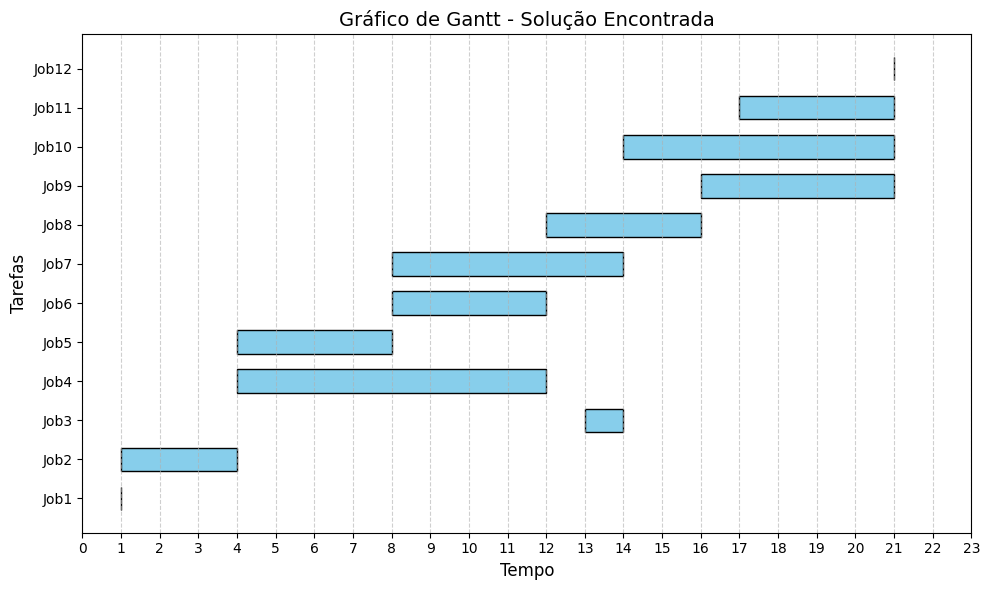

In [12]:
# Buscar apenas a primeira solução válida
first_solution = problem.getSolution()

if first_solution:
    print("\nPrimeira solução encontrada:")
    # Calcular o makespan e a duração total
    end_times = [
        first_solution[f'S_{task}'] + duration[task]
        for task in tasks
    ]
    makespan = max(end_times)
    total_duration = sum(duration[task] for task in tasks)

    # Exibir detalhes da solução
    print(f"  Duração Total: {total_duration}")
    for task in sorted(tasks):
        print(f"  Tarefa {task}: Início = {first_solution[f'S_{task}']}, "
              f"Término = {first_solution[f'S_{task}'] + duration[task]}")
        
    # Gerar o gráfico de Gantt
    plot_gantt_chart(first_solution, duration, tasks)
else:
    print("Nenhuma solução válida foi encontrada.")


## Encontrando a Melhor Solução Ideal

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Nesta seção, buscamos identificar as melhores soluções ótimas, com base no menor **makespan** (tempo total de execução do projeto). Além disso, limitamos o número de soluções exibidas para facilitar a análise e geramos gráficos de Gantt para cada solução selecionada.

### **Objetivo**
- Identificar todas as soluções válidas geradas pelo algoritmo.
- Determinar as soluções ótimas com base no menor **makespan**.
- Exibir apenas um número limitado de soluções ótimas para facilitar a análise.
- Calcular e exibir métricas importantes, como a **duração total** e o **makespan**.
- Gerar gráficos de Gantt para as soluções exibidas.

### **Descrição do Código**
A implementação segue os seguintes passos:

1. **Busca de Todas as Soluções**:
   - A função `problem.getSolutions()` retorna todas as soluções válidas encontradas pelo algoritmo.
   - O número total de soluções é exibido:
     ```python
     print(f"Número de soluções encontradas: {len(solutions)}")
     ```

2. **Cálculo do Makespan e Duração Total**:
   - Para cada solução, o **makespan** (tempo total do projeto) é calculado como o tempo de término da última tarefa:
     ```python
     makespan = max(end_times)
     ```
   - A **duração total** é a soma das durações de todas as tarefas na solução:
     ```python
     total_duration = sum(duration[task] for task in tasks)
     ```

3. **Filtragem das Soluções Ótimas**:
   - Apenas as soluções com o menor **makespan** são consideradas ótimas.
     ```python
     min_makespan = min(makespan for makespan, _, _ in makespan_solutions)
     ```

4. **Limitação do Número de Soluções Exibidas**:
   - O número de soluções ótimas exibidas é limitado pela variável `max_solutions_to_display`.
   - Apenas as primeiras soluções dentro desse limite são exibidas.

5. **Exibição das Soluções**:
   - Para cada solução exibida, os detalhes como **duração total**, tempos de início e término das tarefas são apresentados.

6. **Geração do Gráfico de Gantt**:
   - A função `plot_gantt_chart` é chamada para gerar um gráfico de Gantt para cada solução exibida.

7. **Mensagem de Falha**:
   - Caso nenhuma solução válida seja encontrada, uma mensagem apropriada é exibida:
     ```python
     print("Nenhuma solução válida foi encontrada.")
     ```

Número de soluções encontradas: 710

Listando até 3 com a melhor duração = 46:

Solução 1:
  Duração Total: 46
  Tarefa 1: Início = 0, Término = 0
  Tarefa 2: Início = 0, Término = 3
  Tarefa 3: Início = 12, Término = 13
  Tarefa 4: Início = 3, Término = 11
  Tarefa 5: Início = 3, Término = 7
  Tarefa 6: Início = 7, Término = 11
  Tarefa 7: Início = 7, Término = 13
  Tarefa 8: Início = 11, Término = 15
  Tarefa 9: Início = 15, Término = 20
  Tarefa 10: Início = 13, Término = 20
  Tarefa 11: Início = 16, Término = 20
  Tarefa 12: Início = 20, Término = 20


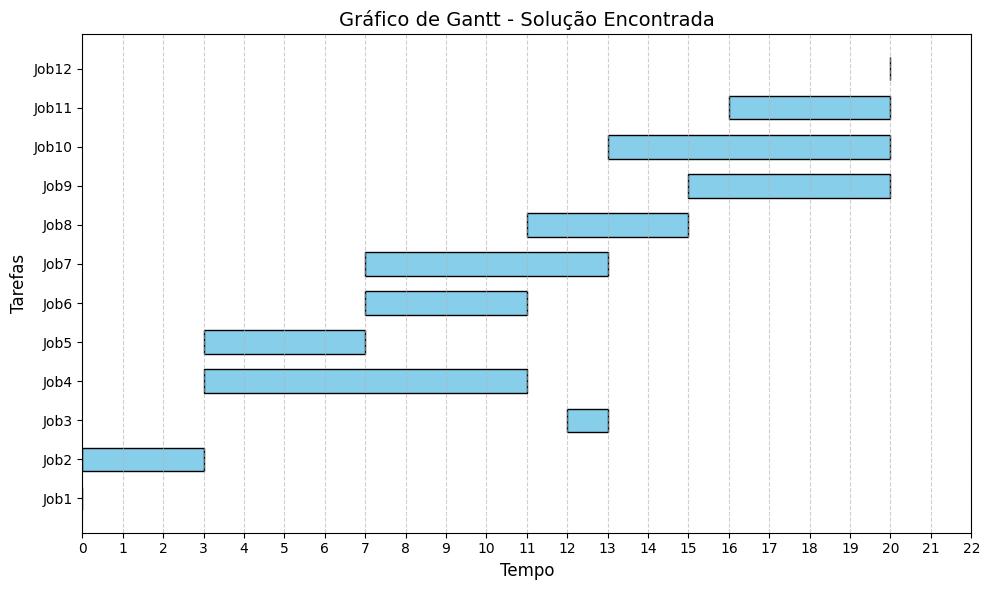


Solução 2:
  Duração Total: 46
  Tarefa 1: Início = 0, Término = 0
  Tarefa 2: Início = 0, Término = 3
  Tarefa 3: Início = 11, Término = 12
  Tarefa 4: Início = 3, Término = 11
  Tarefa 5: Início = 3, Término = 7
  Tarefa 6: Início = 7, Término = 11
  Tarefa 7: Início = 7, Término = 13
  Tarefa 8: Início = 11, Término = 15
  Tarefa 9: Início = 15, Término = 20
  Tarefa 10: Início = 13, Término = 20
  Tarefa 11: Início = 16, Término = 20
  Tarefa 12: Início = 20, Término = 20


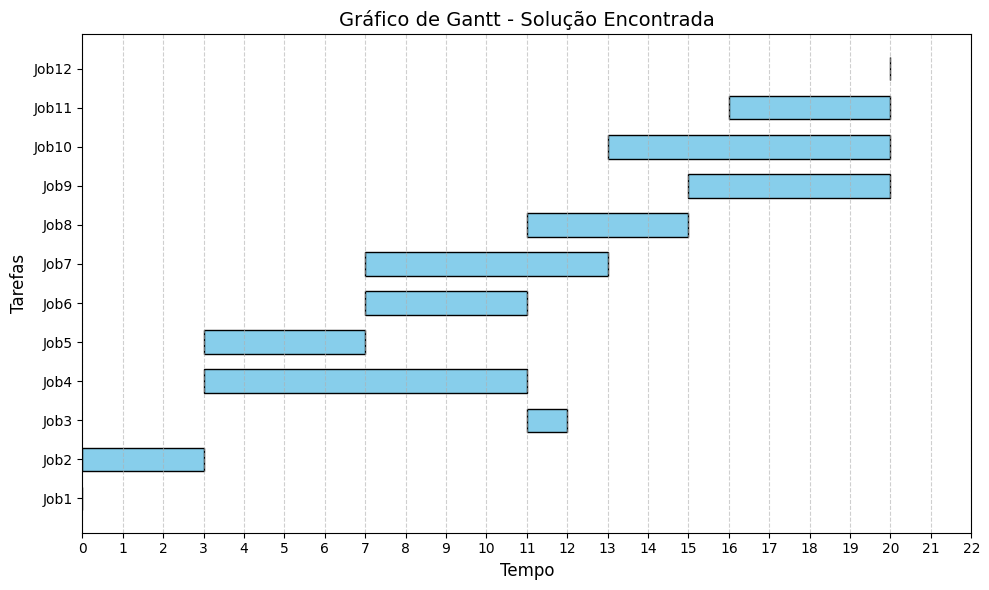


Solução 3:
  Duração Total: 46
  Tarefa 1: Início = 0, Término = 0
  Tarefa 2: Início = 0, Término = 3
  Tarefa 3: Início = 10, Término = 11
  Tarefa 4: Início = 3, Término = 11
  Tarefa 5: Início = 3, Término = 7
  Tarefa 6: Início = 7, Término = 11
  Tarefa 7: Início = 7, Término = 13
  Tarefa 8: Início = 11, Término = 15
  Tarefa 9: Início = 15, Término = 20
  Tarefa 10: Início = 13, Término = 20
  Tarefa 11: Início = 16, Término = 20
  Tarefa 12: Início = 20, Término = 20


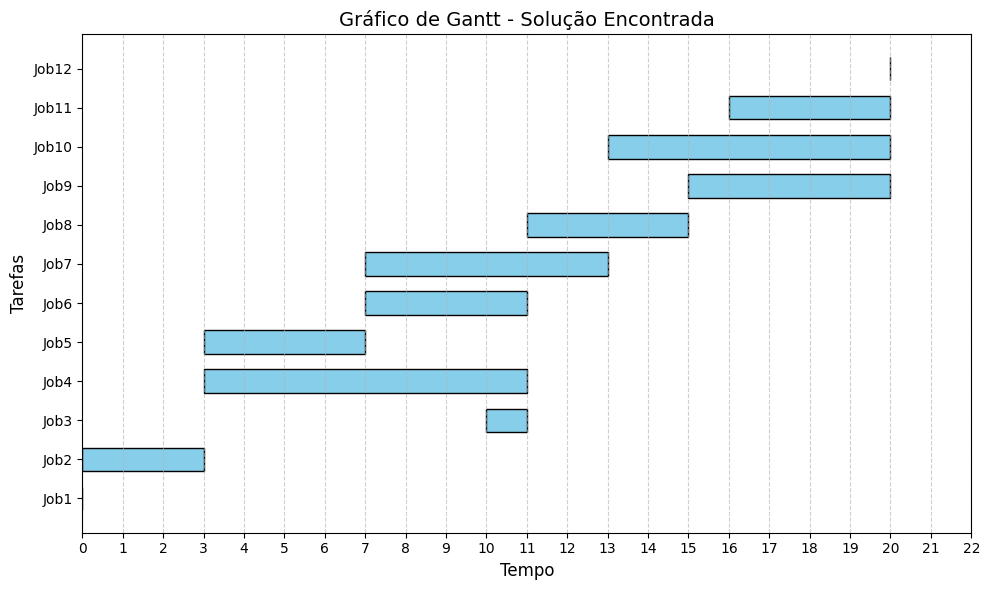

In [13]:
# Gerar todas as soluções válidas
solutions = problem.getSolutions()
print(f"Número de soluções encontradas: {len(solutions)}")

if solutions:
    # Lista para armazenar soluções, seus makespans e duração total
    makespan_solutions = []

    # Calcular makespan e duração total para cada solução
    for solution in solutions:
        # Calcula o tempo de término da última tarefa
        end_times = [
            solution[f'S_{task}'] + duration[task]
            for task in tasks
        ]
        makespan = max(end_times)

        # Calcula a soma das durações das tarefas (duração total da solução)
        total_duration = sum(duration[task] for task in tasks)

        # Armazena makespan, duração total e a solução
        makespan_solutions.append((makespan, total_duration, solution))

    # Filtrar soluções ótimas (menor makespan)
    min_makespan = min(makespan for makespan, _, _ in makespan_solutions)
    optimal_solutions = [
        (makespan, total_duration, solution)
        for makespan, total_duration, solution in makespan_solutions if makespan == min_makespan
    ]

    # Limitar o número de soluções a exibir
    max_solutions_to_display = 3
    solutions_to_display = optimal_solutions[:max_solutions_to_display]

    # Pegue a melhor duração de uma das soluções ótimas
    best_duration = optimal_solutions[0][1] if optimal_solutions else None

    # Exibir soluções ótimas limitadas
    print(f"\nListando até {max_solutions_to_display} com a melhor duração = {best_duration}:")
    for i, (makespan, total_duration, solution) in enumerate(solutions_to_display, start=1):
        print(f"\nSolução {i}:")
        print(f"  Duração Total: {total_duration}")
        for task in sorted(tasks):
            print(f"  Tarefa {task}: Início = {solution[f'S_{task}']}, "
                  f"Término = {solution[f'S_{task}'] + duration[task]}")

        # Gerar o gráfico de Gantt para a solução
        plot_gantt_chart(solution, duration, tasks)

else:
    print("Nenhuma solução válida foi encontrada.")


## Análise Final, Reflexões e Impacto do Projeto

<div style="text-align: justify; margin: 10px; line-height: 1.6;">

Este projeto demonstrou a aplicação prática de algoritmos de programação por restrições (CSP) para resolver problemas de agendamento de tarefas. Desde a leitura e parsing de datasets até a visualização das melhores soluções em gráficos de Gantt, todas as etapas do desenvolvimento enfatizaram a importância de unir eficiência computacional com clareza na representação de resultados.

### **Principais Resultados**
- O algoritmo foi capaz de encontrar soluções válidas que respeitam as restrições de precedência, limitações de recursos e prazos estabelecidos.
- A geração de gráficos de Gantt para as melhores soluções facilitou a análise e validação do cronograma final.
- O uso de estratégias para validar domínios e aplicar restrições garantiu que as soluções geradas fossem robustas e otimizadas.

### **Aprendizados e Desafios**
- A implementação das restrições de recursos foi um dos desafios mais complexos, destacando a necessidade de projetar funções modulares e de fácil reutilização.
- O processo de integração de variáveis, domínios e restrições evidenciou a importância de uma estruturação clara para evitar inconsistências.
- A visualização dos resultados através de gráficos de Gantt destacou a importância da análise visual no entendimento de soluções complexas.

### **Contribuições**
Este projeto contribuiu para:
1. Melhorar a compreensão e aplicação de CSPs em problemas reais.
2. Demonstrar como restrições de precedência e recursos podem ser modeladas matematicamente.
3. Oferecer um exemplo prático de como resolver problemas de agendamento em Python utilizando bibliotecas especializadas.

### **Próximos Passos**
- Ampliar o algoritmo para lidar com cenários mais complexos, incluindo novas restrições e critérios de otimização.
- Implementar técnicas de otimização heurísticas para melhorar o desempenho em datasets maiores.
- Explorar a integração com outras bibliotecas de visualização para aprimorar a análise gráfica.

### **Reflexão Final**
Este projeto mostrou como a combinação de técnicas computacionais avançadas e boas práticas de programação pode resultar em soluções eficazes para problemas complexos. A experiência obtida ao longo do desenvolvimento será útil em futuros desafios relacionados à otimização e inteligência artificial.

</div>
